In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DL /diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df["BloodPressure"].value_counts().sort_values()

122     1
40      1
38      1
24      1
114     1
61      1
102     1
95      1
104     2
108     2
55      2
46      2
30      2
106     3
100     3
110     3
98      3
96      4
44      4
48      5
85      6
94      6
65      7
75      8
92      8
54     11
52     11
56     12
50     13
58     21
86     21
90     22
84     23
88     25
82     30
66     30
62     34
0      35
60     37
76     39
80     40
64     43
72     44
78     45
68     45
74     52
70     57
Name: BloodPressure, dtype: int64

In [9]:
df["SkinThickness"].value_counts().sort_values()

99      1
60      1
51      1
63      1
56      1
8       2
7       2
52      2
54      2
49      3
50      3
47      4
48      4
10      5
44      5
45      6
43      6
11      6
16      6
14      6
12      7
38      7
46      8
34      8
21     10
13     11
42     11
24     12
20     13
17     14
15     14
36     14
41     15
35     15
25     16
40     16
22     16
26     16
37     16
29     17
39     18
19     18
31     19
28     20
18     20
33     20
23     22
27     23
30     27
32     31
0     227
Name: SkinThickness, dtype: int64

In [10]:
df["BMI"].value_counts().sort_values()

42.8     1
20.1     1
30.3     1
30.7     1
43.2     1
        ..
33.3    10
0.0     11
31.2    12
31.6    12
32.0    13
Name: BMI, Length: 248, dtype: int64

<li><b>Here we can observe that the null values is replaced by 0, because how a person can have BMI, skinthickness, BloodPressure, etc as 0 it is not
possible so we will replace it with some central tendency.</b></li>

In [11]:
# Replacing 0 by NaN

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
# Again, getting no. of missing values in each column 

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
# Filling NaN values 

df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [14]:
# Checking missing values correctly replaced

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
# Finding pairwise correlation of all columns

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.230862,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281319,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543162,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230862,0.281319,0.543162,0.180170,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.311924,0.173844,0.238356,1.000000


In [16]:
# Getting unique values 

df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [17]:
  # Finding counts of unique values and sorting it in ascending order

df['Pregnancies'].value_counts().sort_values()

17      1
15      1
14      2
12      9
13     10
11     11
10     24
9      28
8      38
7      45
6      50
5      57
4      68
3      75
2     103
0     111
1     135
Name: Pregnancies, dtype: int64

In [18]:
# Grouping predictor variables by target variable

df.groupby("Outcome")[["Pregnancies","Glucose","BloodPressure"]].agg(['max','min','mean'])

Pregnancies                ... BloodPressure                 
                max min      mean  ...           max   min       mean
Outcome                            ...                               
0                13   0  3.298000  ...         122.0  24.0  70.920000
1                17   0  4.865672  ...         114.0  30.0  75.123134

[2 rows x 9 columns]

In [19]:
df.groupby("Outcome")[["SkinThickness","Insulin","BMI","Age"]].agg(['max','min','mean'])

SkinThickness                 Insulin  ...        BMI Age               
                  max  min       mean     max  ...       mean max min       mean
Outcome                                        ...                              
0                60.0  7.0  27.726000   744.0  ...  30.888434  81  21  31.190000
1                99.0  7.0  31.686567   846.0  ...  35.384757  70  21  37.067164

[2 rows x 12 columns]

In [20]:
# Model
X = df.drop("Outcome",axis = 1)
y = df["Outcome"]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
X_train.shape

(537, 8)

In [23]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

In [24]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#mm = MinMaxScaler()
#X_train_mm = mm.fit_transform(X_train)
#X_test_mm = mm.transform(X_test)

In [25]:
import tensorflow as tf

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1,input_shape=(X.shape[1],), activation="sigmoid")                                
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss="binary_crossentropy",optimizer="sgd")

In [29]:
history = model.fit(X_train_ss,y_train,epochs=60,batch_size=30)

Epoch 1/60
18/18 [==============================] - 0s 1ms/step - loss: 0.8886
Epoch 2/60
18/18 [==============================] - 0s 1ms/step - loss: 0.8319
Epoch 3/60
18/18 [==============================] - 0s 1ms/step - loss: 0.7986
Epoch 4/60
18/18 [==============================] - 0s 1ms/step - loss: 0.7882
Epoch 5/60
18/18 [==============================] - 0s 1ms/step - loss: 0.8086
Epoch 6/60
18/18 [==============================] - 0s 936us/step - loss: 0.7772
Epoch 7/60
18/18 [==============================] - 0s 1ms/step - loss: 0.7775
Epoch 8/60
18/18 [==============================] - 0s 1ms/step - loss: 0.7350
Epoch 9/60
18/18 [==============================] - 0s 999us/step - loss: 0.7302
Epoch 10/60
18/18 [==============================] - 0s 959us/step - loss: 0.6697
Epoch 11/60
18/18 [==============================] - 0s 1ms/step - loss: 0.6804
Epoch 12/60
18/18 [==============================] - 0s 1ms/step - loss: 0.6986
Epoch 13/60
18/18 [========================

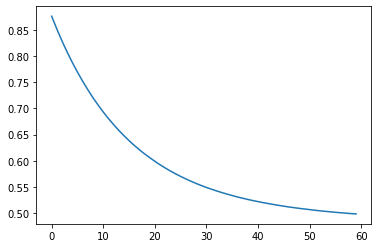

In [30]:
plt.plot(history.history["loss"])

In [31]:
y_pred = model.predict(X_test_ss)

In [32]:
y_pred = np.where(y_pred >= 0.5, 1,0)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.84       146
           1       0.76      0.66      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.79      0.80      0.79       231



<p><b>The score is not that good but we have try with single neuron, we can increase the score further by adding the layers, by chainging the activation function and optimizer, increasing/decreasing the epoch, etc.</b></p>